In [130]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pymc3 as pm
import theano.tensor as tt
%matplotlib inline

# Classical & Bayesian Estimation

### Recommended Book: Greene, W. H. (2003). Econometric analysis. Pearson Education India.
1. Handbook for econometric & statistical analysis and modeling: linear & nonlinear, panel & time-series data, LS & ML & GMM & Bayesian
2. Answers for most of interview questions reagrding statistics and modeling: multicollinearity
3. Implications on the connection between econometrics and machine learning: adjusted R-square, information criteria & regularization

#### Related Chapter:  
Chapter 5 - Hypothesis Testing

Chapter 16 - Bayesian Estimation

Chapter 12 - Estimation Frameworks in Econometrics

### Different Estimations
-  LS (BLUE) & ML & GMM & Bayesian
-  Full & Semi & Non-Parametric Estimation
-  Different Assumptions, Properties & Conclusions

## Hypothesis Testing

#### Linear Regression:
-  Estimation
-  Prediction
-  Hypothesis Testing: Test if a variable is relevant or its parameter is equal to some value based on data.

#### Baseline Regression Model:
$y = \beta\ X + \epsilon$

$y = \beta_1\ X_1 + \beta_2\ X_2 + \beta_3\ X_3 + \epsilon$

#### A Standard Dynamic Lending Model:
##### Tesing if bank's capital ratio matters for its lending decisison: $\eta\ = 0$ ?
$\Delta \ln L_{i,t} = \alpha_{i} + \theta_{t} + \sum_{j=1}^{4} \beta_j\ \Delta \ln L_{i,t-j} + \eta\ Capital_{i,t-1} + \sum_{j=1}^{4}\ \mu_j\ \Delta MP_{t-j} + \phi\ Z_{i,t-j}+\epsilon_{i,t}$

OLS assumption is violated, so OLS and FE are not consistent, use system GMM to reach a consistent and efficient estimation.

#### Questions:
How do we decide if the parameter is close to zero enough?

How certain are we?

How likely we are actually wrong?

#### Tesing if $\beta_1$ equals to something conditional on that $X_2$ and $X_3$ has been taken care:
$H_0: \beta_2 = 0$

$H_1: \beta_2 \neq 0$

Based on data


#### Method:
Neyman & Pearson (1933): Rejection region and acceptance regaion.  Or Critical Value.

Test how far the parameter suggested by data is from the assumed value or 0 to give a enough confidence that we can make a conclusion.

Linear & Nonlinear Restrictions: Wald tests (test restriction's closeness to 0), Fit based tests ($R^2$).

Should be in matrix form, but for simplicity:

Wald Test (significance or distance test): $W = \dfrac{\beta_1 - \beta_0}{\sqrt{\sigma^2}}$

Cannot observe population variance, use sample variance instead:

T Test: $t = \dfrac{b - \beta_0}{\sqrt{s^2}}$

Compare with critical value which is based on $\alpha$ (size) and degree of freedom (N-K)

In Short:
$t = \dfrac{b}{s}$, and usually compare with 1.96 if sample is large.  Units of standard deviation from 0, the large the t is, the more likely the parameter is not zero, or the more likely the variable is relevant.

#### Two types of Error
Type I Error: Fail to accept $H_0$

Type II Error: Fail to reject $H_0$

Size of the test: Probability of Type I error.  Probability of incorrectly reject the null.

Power of a test: 1 - Probability of Type II error.  Probability of correctly reject a false null.

P-value, probability of making type I error.  The smaller, the better.  The smaller the p-value is, the large the t statistics will be, the more significant the variable is, and the parameter is more likely to be non-zero.

Graph I created using tool from Website: http://www.imathas.com/stattools/norm.html

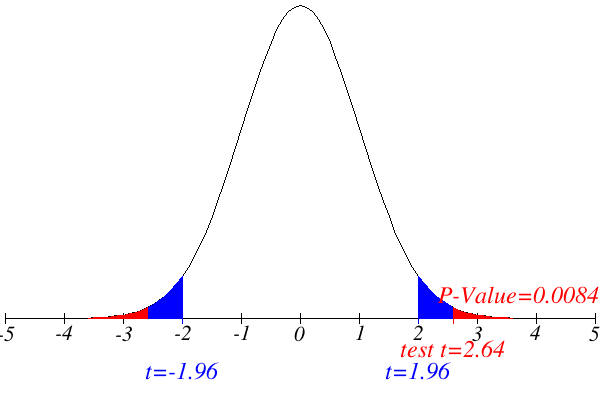

In [12]:
Image(filename='ttest.png', width = 550)

Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283

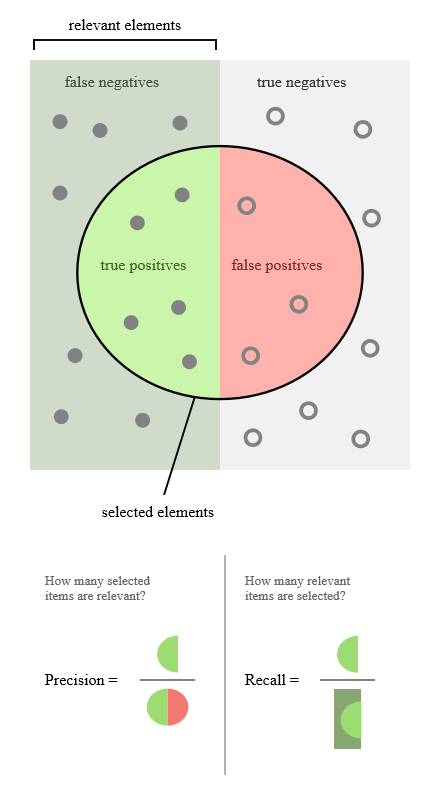

In [17]:
Image(filename='precisionrecall.png', width = 450)

$Precision = \dfrac{TP}{TP + FP}$

$Recall = \dfrac{TP}{TP + FN}$

$H_0$ : Negative

$H_1$ : Positive

Type I Error: Fail to accept $H_0$, False Positive, 3

Type II Error: Fail to reject $H_0$, False Negative, 7

#### Assumptions
Consistent if power goes to 1 as sample size grows to infinity.  Testing procedure is consistent if testing based on a consistent estimator.  For linear regression, LS is best linear unbiased estimator (BLUE).

Linear Regression Model Assumptions: LS is BLUE, effecient and consistent
1. Linearity: Linear relationship between y and X, linear in parameter, not variable, for example: log and higher order.
2. Full rank: no exact linear relationship among X, or multicollinearity, identification problem.  Test VIF.
3. Exogeneity of the independent variables: no correlation between X and $\epsilon$, biased and inconsistent, omitted variable bias.  Use instruments or lag...
4. iid disturbance, no autocorrelation between disturbance, and homoscedasticity or constant variance $\sigma^2$.  Use robust variance
5. Stochastic or nonstochastic data
6. Normal distribution of disturbances

In the above lending model, assumption 3 is violated, LS is not consistent anymore.  So use GMM.

5 & 6 might be relaxed for large sample, 1 - 4 are strong

Small sample, t test, disturbances normally distributed: Can carry the test result to parameter.  Population variance cannot be observed, use sample variance instead.  As sample size increase, quality of t statistics approximation improves, asymptotically normal, no need for normally distributed disturbance.  Central Limit Theorem.  Wald test, Z test or $\chi^2$ might be more efficient than t.

#### Coding Example for A Simple Regression using Bank Data

In [177]:
bank = pd.read_csv(r'C:\Users\zefan\Desktop\CapStone_Project\bank.csv')

In [178]:
bank.head()

,cert,name,stalp,sc,idlnls,intexpy,nonixay,rbc1aaj,rbc1rwaj,rbcrwaj,...,npl,cet1,yd09,yd13,q1,q2,q3,q4,stress,basel
0,9,Union Trust Company,ME,97811,214531,3.354426,3.635234,7.396668,12.90231,14.15748,...,2.075906,12.90231,0,0,0,0,0,1,0,0
1,9,Union Trust Company,ME,99982,219438,2.274367,3.377611,7.715183,13.33261,14.58879,...,1.144735,13.33261,0,0,1,0,0,0,0,0
2,9,Union Trust Company,ME,107207,224276,2.236159,3.517961,7.733468,13.39351,14.64933,...,0.872765,13.39351,0,0,0,1,0,0,0,0
3,9,Union Trust Company,ME,108398,229173,2.191243,3.500027,7.681346,13.29637,14.55234,...,1.249328,13.29637,0,0,0,0,1,0,0,0
4,9,Union Trust Company,ME,104355,231758,2.138290,3.620069,7.656856,13.66623,14.92180,...,1.994018,13.66623,0,0,0,0,0,1,0,0


In [179]:
bank.shape

(502954, 35)

In [180]:
bank.describe()

,cert,sc,idlnls,intexpy,nonixay,rbc1aaj,rbc1rwaj,rbcrwaj,rbct1cer,time,...,npl,cet1,yd09,yd13,q1,q2,q3,q4,stress,basel
count,502954.00000,5.029540e+05,5.029540e+05,502236.000000,502283.000000,502282.000000,502278.000000,502278.000000,93155.000000,502954.000000,...,502954.000000,502278.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000
mean,21556.28633,3.156285e+05,9.324236e+05,1.630615,3.539370,11.566651,21.404724,22.531715,18.466988,29.796226,...,1.819636,21.074640,0.484273,0.240557,0.250904,0.249049,0.247196,0.252852,0.008412,0.110207
std,16638.06825,5.740283e+06,1.456079e+07,3.141237,7.064994,21.622764,221.955190,221.947820,420.886827,18.135909,...,2.244437,229.765550,0.499753,0.427422,0.433534,0.432462,0.431382,0.434647,0.091332,0.313148
min,9.00000,-2.151900e+05,0.000000e+00,-0.044499,-6.054278,-519.469100,-2300.000000,-2300.000000,-12.459700,1.000000,...,0.000000,-33959.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9319.00000,9.448000e+03,3.794900e+04,0.679787,2.397687,8.399933,11.505750,12.651472,0.000000,14.000000,...,0.512319,11.452480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17514.00000,2.500050e+04,8.796450e+04,1.512787,2.903993,9.730633,14.285140,15.419890,12.962200,29.000000,...,1.191045,14.235805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30152.00000,6.472475e+04,2.151938e+05,2.384280,3.510888,11.855207,19.117432,20.212487,17.441650,45.000000,...,2.320510,19.095505,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,91363.00000,4.173600e+08,9.487640e+08,1880.000000,780.952400,8290.625000,74283.340000,74283.340000,74283.300000,64.000000,...,84.153990,74283.340000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
bank.isnull().any()

cert        False
name        False
stalp       False
sc          False
idlnls      False
intexpy      True
nonixay      True
rbc1aaj      True
rbc1rwaj     True
rbcrwaj      True
rbct1cer     True
time        False
fedfunds    False
unrate      False
lnloan      False
lnsc         True
lngdp        True
lncs         True
lnpi         True
grre         True
lnasset     False
lr          False
inf          True
profit       True
chr          True
npl         False
cet1         True
yd09        False
yd13        False
q1          False
q2          False
q3          False
q4          False
stress      False
basel       False
dtype: bool

In [182]:
len(bank[bank['cet1'].isnull() == True])

676

In [183]:
bank2 = bank.dropna(axis = 0, subset=['cet1'])

In [184]:
bank.shape

(502954, 35)

In [185]:
bank2.shape

(502278, 35)

In [186]:
y = np.array(bank2['idlnls'])

In [187]:
X = np.array(bank2[['cet1', 'npl']])

#### Using sklearn, calculate t and p by self?

In [188]:
lr = LinearRegression().fit(X, y)

In [189]:
lr.coef_

array([  -151.2831301 ,  46528.99414244])

In [190]:
lr.intercept_

849556.43423228431

#### Using stats model

In [86]:
Xc = sm.add_constant(X)

In [87]:
est = sm.OLS(y, Xc)

In [88]:
result = est.fit()

In [89]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.51
Date:                Fri, 18 May 2018   Prob (F-statistic):           5.02e-07
Time:                        16:06:25   Log-Likelihood:            -8.9975e+06
No. Observations:              502278   AIC:                         1.800e+07
Df Residuals:                  502275   BIC:                         1.800e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.496e+05   2.66e+04     31.981      0.000    7.97e+05    9.02e+05
x1          -151.2831     89.489     -1.691      0.091    -326.680      24.113
x2          4.653e+04   9158.843      5.080      0.000    2.86e+04    6.45e+04
==============================================================================
Omnibus:                  1473231.188   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      86190536821.533
Skew:                          41.652   Prob(JB):                         0.00
Kurtosis:                    2030.669   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Example from My Research

A Dynamic Bank Lending Regression Output From Stata, System GMM:

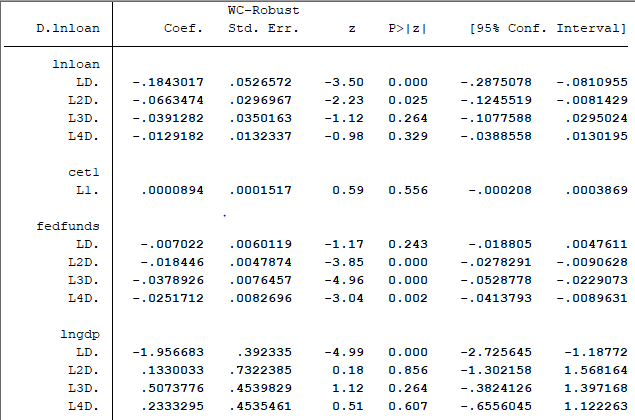

In [20]:
Image(filename='gmm.png', width = 600)

A Presentation Report:

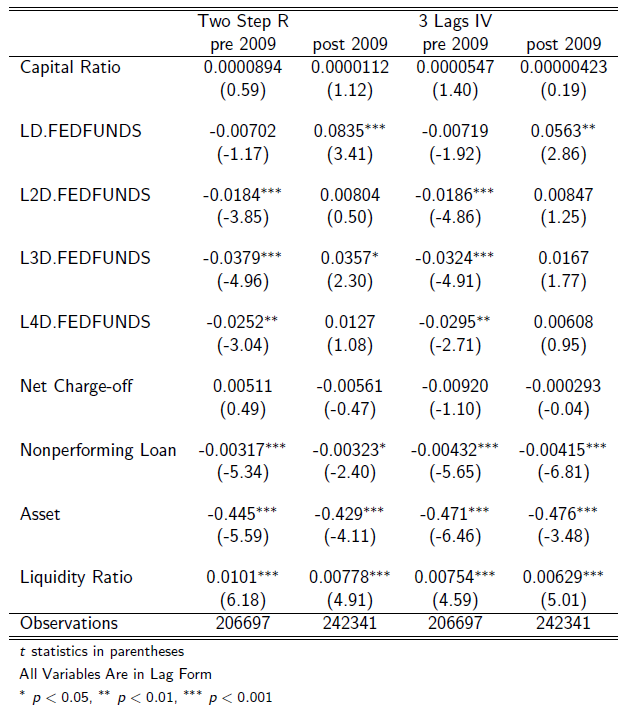

In [23]:
Image(filename='gmmp.png', width = 500)

## Bayesian Estimation

#### Another Method:
Neyman-Pearson: All-or-nothing, establish testing rule, either reject or not.

What if the test statistics is close to the boundary?  Should we reject or not?  And cannot incorporate results from other studies.

Bayesian: Middle ground, continually update prior beliefs.  Combining evidence from before (prior beliefs) with the current evidence (data) to reach a new conclusion (posterior beliefs).  Involve subjective beliefs.

Bayesian methods were employed since around 1970.  Until recently, with advance in technique (Gibbs sampler) and technology, the method become widespread.

#### Bayes's Theorem

$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$

$P(parameters|data) = \dfrac{P(data|parameters)P(parameters)}{P(data)}$

$P(parameters|data) \propto \dfrac{P(data|parameters)P(parameters)}{P(data)} \\
= Likelihood\  function \times Prior\  density$

Likelihood Function: the joint distribution of the observed data given the parameters (Model).  Classical Linear Regression: Conditional Multivariate Normal Distribution.

Prior Density: prior belief of the parameters.

Feed data to the prior beliefs to get the new beliefs of the parameters.  Feed the sampling estimation to the prior beliefs to get new beliefs.  As sample size increases, Bayesian estimation will converge to Maximum Likelihood estimation unless prior beliefs change as sample size increases.

#### Bayesian Estimation

Classical: information on fixed parameters of the model.

Bayesian: information from observed data given the assumed prior.  Mean of the posterior.
- Likelihood Function of Data
- Prior Density of Parameters

#### Prior
- Noninformative Prior: a flat or uniform distribution on the parameter.  When no prior information, the posterior result will be dominated by the sample data, this is similar to the classical sampling theroy estimator: Maximum Likelihood.  Noninformative prior estimation should be the same as sampling estimation.  An informative prior estimation might reduce the estimation variance if prior is informative.  Only interpretation different: Bayesian - estimated distribution for $\beta$, Classical - estimation for a fixed parameter $\beta$.


- Informative Prior: culculation become complicated when prior distributions are involved.  Conjugate Prior - the prior which has the same form as the conditional density and posterior.  Check the data's distribution and likelihood.  Normal - gamma prior. Example: likelihood function involve proportions - beta prior.

$Likelihood\ Function = \theta^{D}(1 - \theta)^{N - D}$

$Beta\ Distribution = \dfrac{\Gamma(\alpha + \beta)\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{\Gamma(\alpha)\Gamma(\beta)}$

A table from Wikipedia: https://en.wikipedia.org/wiki/Conjugate_prior

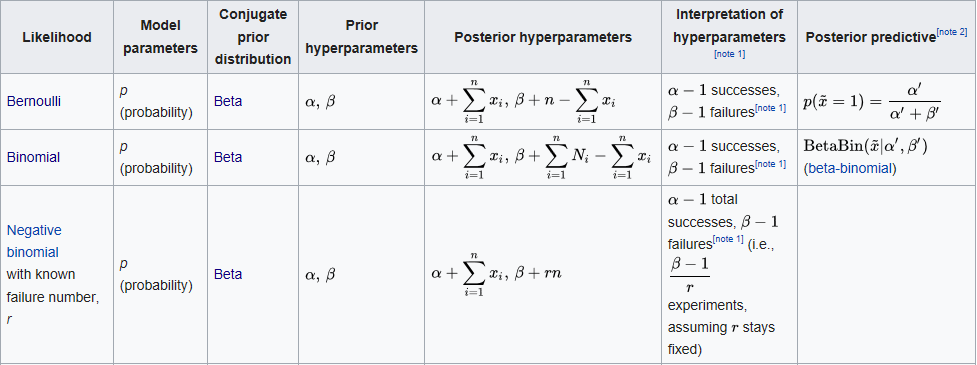

In [6]:
Image(filename='conjugate.png', width = 800)

#### Hypothesis Testing

Comparing Hypothesis

$Odds_{posterior} = Bayes\ Factor \times Odds_{Prior}$

$Odds = \dfrac{P(H_0)}{P(H_1)}$

#### Posterior Distribution, Gibbs Sampler

Hard to generate posterior characteristics due to complicated integrals.  Draw large random sample from the posterior density, then use simulation-based estimation to infer characteristics of posterior distribution.

Gibbs Sampler: use certain iteration to draw sample from joint population.

Should be similar to MLE, but might be slower.

#### Assumptions - similar to MLE assumptions?
- Model Assumptions
- Similar assumption to MLE, the difference is that Bayesian estimation has priors
- Distubance normally distributed, might be relax if large sample, asymptotic normality
- Might need to do something for heterscadasticity
- LS and MLE should be same when disturbance is normally distributed

#### Example: Bernoulli Distribution - Probability of Tossing a Coin
- Observed y, it is either a head or tail.
- Bernoulli distribution with a single parameter: probability
- Estimate the parameter

#### Generate random data with probability = 0.5 for both head and tail

In [120]:
y = np.random.choice((0 ,1), 1000, p = [0.5, 0.5])

In [121]:
y[0:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [122]:
len(y[y == 0])/len(y[y == 1])

1.0080321285140563

In [123]:
len(y[y == 0])

502

#### Noninformative Prior

In [158]:
with pm.Model() as coin:
    p_prior = pm.Uniform('p', 0, 1)
    
    like = pm.Bernoulli('likelihood', p = p_prior, observed = y)

In [159]:
with coin:
    step = pm.Metropolis()
    trace = pm.sample(5000, step = step, njobs = 1)

Sequential sampling (2 chains in 1 job)
Metropolis: [p_interval__]
100%|█████████████████████████████████████| 5500/5500 [00:42<00:00, 128.50it/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8DE7B8278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A8DB22E860>]], dtype=object)

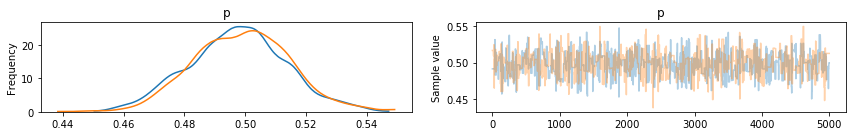

In [163]:
pm.traceplot(trace)

In [173]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.498134,0.015721,0.000465,0.467866,0.528917,872.983079,1.002001


#### Beta Prior

In [165]:
with pm.Model() as coin2:
    p_prior2 = pm.Beta('p2', alpha = 1, beta = 1)
    
    like2 = pm.Bernoulli('likelihood2', p = p_prior2, observed = y)
    
    step = pm.Metropolis()
    
    trace2 = pm.sample(5000, step = step, njobs = 1)

Sequential sampling (2 chains in 1 job)
Metropolis: [p2_logodds__]
100%|█████████████████████████████████████| 5500/5500 [00:42<00:00, 130.53it/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8DA797BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A8DEEB96D8>]], dtype=object)

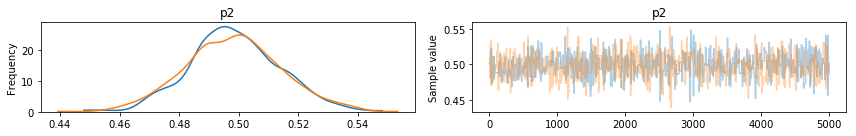

In [166]:
pm.traceplot(trace2)

In [174]:
pm.summary(trace2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p2,0.498385,0.015533,0.000466,0.469033,0.529959,952.760013,1.000199


#### Another data with p = 0.2 for head and 0.8 for tail

In [167]:
y2 = np.random.choice((0 ,1), 1000, p = [0.8, 0.2])

Sequential sampling (2 chains in 1 job)
Metropolis: [p2_logodds__]
100%|█████████████████████████████████████| 5500/5500 [00:43<00:00, 127.72it/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8E01272B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A8E01844E0>]], dtype=object)

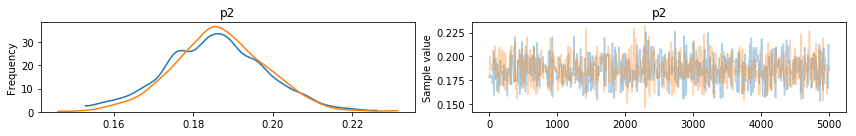

In [172]:
with pm.Model() as coin2:
    p_prior2 = pm.Beta('p2', alpha = 1, beta = 1)
    
    like2 = pm.Bernoulli('likelihood2', p = p_prior2, observed = y2)
    
    step = pm.Metropolis()
    
    trace3 = pm.sample(5000, step = step, njobs = 1)
pm.traceplot(trace3)

In [175]:
pm.summary(trace3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p2,0.186179,0.012104,0.000391,0.162526,0.210263,1052.365317,1.002343


#### Update prior using posterior from previous results

#### Use Part of the Bank Data

In [205]:
with pm.Model() as ols:
    a = pm.Normal('a', mu = 0, sd = 100)
    b = pm.Normal('b', mu = 0, sd = 100)
    c = pm.Normal('c', mu = 0, sd = 100)
    sigma = pm.HalfNormal('sigma', sd = 1)
    
    y_fit = a*X[0:1000, 0] + b*X[0:1000, 1] + c
    likelihood = pm.Normal('y', mu = y_fit, sd = sigma, observed = y[0:1000])
    
    step = pm.Metropolis()
    trace5 = pm.sample(1000, step = step, njobs = 1)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_log__]
>Metropolis: [c]
>Metropolis: [b]
>Metropolis: [a]
100%|██████████████████████████████████████| 1500/1500 [05:01<00:00,  4.97it/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8819D5208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A8825837B8>]], dtype=object)

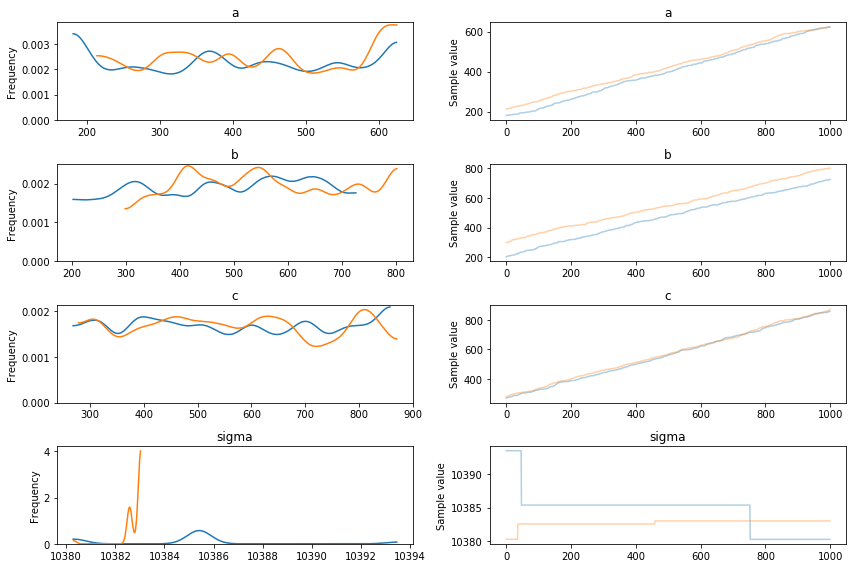

In [206]:
pm.traceplot(trace5)

In [208]:
pm.summary(trace5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,412.591699,127.826186,12.779722,211.174685,623.798859,4.992921,1.007492
b,512.394480,150.881227,15.084559,267.133479,802.445531,4.510933,1.069985
c,567.114084,171.280595,17.123913,297.682503,851.799670,5.027999,1.000143
sigma,10383.618158,2.295458,0.224787,10380.281194,10385.377744,4.679729,1.159283


#### Same data using MLE (Sampling Estimation), Difference in Prior?  And data used is not enough

In [213]:
Xc2 = sm.add_constant(X[0:1000, :])
est = sm.OLS(y[0:1000], Xc2)
result = est.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     43.53
Date:                Sun, 20 May 2018   Prob (F-statistic):           7.52e-19
Time:                        18:02:14   Log-Likelihood:                -16382.
No. Observations:                1000   AIC:                         3.277e+04
Df Residuals:                     997   BIC:                         3.279e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.472e+06   2.18e+05     11.332      0.000    2.04e+06     2.9e+06
x1         -3.041e+04   7741.768     -3.927      0.000   -4.56e+04   -1.52e+04
x2          -5.17e+05   5.77e+04     -8.953      0.000    -6.3e+05   -4.04e+05
==============================================================================
Omnibus:                      874.087   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17606.375
Skew:                           4.155   Prob(JB):                         0.00
Kurtosis:                      21.802   Cond. No.                         50.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""